# OLS Regression

In [37]:
# %conda env remove --name dql --yes
# %conda env create -f requirements.yaml
# %pip install plotly cufflinks statsmodels

Note: you may need to restart the kernel to use updated packages.


In [77]:
import math
#import eikon as ek
import numpy as np
import pandas as pd
from pylab import plt
# print(plt.style.available)
plt.style.use ('seaborn-v0_8')
import cufflinks as cf
cf.set_config_file(offline=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# This line will make your visualizations appear in your notebook
init_notebook_mode(connected=True)

# This line allows us to use cufflinks offline
cf.go_offline()

## 1. 1D Example

First we generate some data mimicking "real world" data with a linear relationship.

In [39]:
x = np.linspace(0, 5, 100)
y = 2 + 0.5 * x + np.random.standard_normal(len(x)) * 0.15

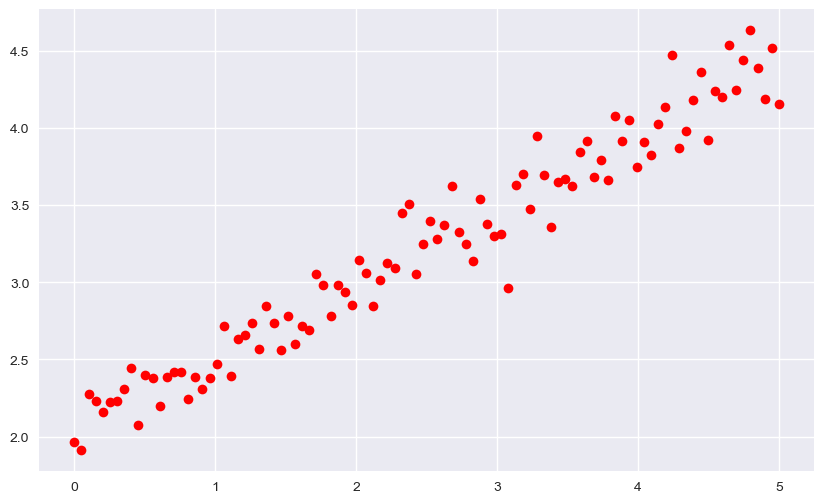

In [40]:
plt.figure(figsize=(10, 6))
plt. plot(x, y, 'ro')

In [41]:
cov = np.cov(x, y)[0, 1]

In [42]:
beta = cov / x.var()

In [43]:
alpha = y.mean() - beta * x.mean()

By printing `alpha` and `beta`, we can compare with our generating function.

In [44]:
alpha, beta

(2.0245797469352973, 0.48283144008469)

Now we can visualise our OLS fit.

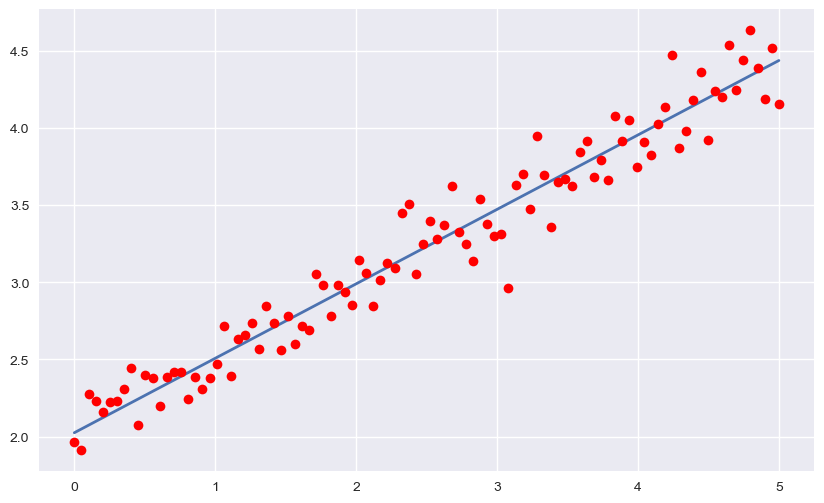

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(x, alpha + beta *  x, lw=2.0)
plt.plot(x, y, 'ro'); 

## Checking the Residuals

The residuals contain useful information. In particular, they are useful for checking the validity of the assumptions of OLS:

1. **linearity**: the model is linear in its parameters (coefficients and error term)
2. **independence**: independent variables should not be prefectly correlated with each other (no multicolinearity)
3. **zero mean**: the mean of the residuals should be zero
4. **no correlation**: residuals should not be correlated with the independant variables
5. **homoscedasticity**: the standard deviation of the residuals should be constant
6. **no autocorrelation**: the residuals should not be correlated with each other

Check:

1. **linearity**: given
2. **independence**: This is automatically satisfied, since there is only one independent variable.
3. **zero mean**: mean zero given (see below)
4. **no correlation**: correlation of zero (see below)
5. **homoscedasticity**: given (see below)
6. **no autocorrelation**: given (see below)

In [46]:
r = alpha + beta * x - y

### Zero-mean Check

In [47]:
print(f"Zero mean check: {r.mean()}")

Zero mean check: -4.1522341120980857e-16


### No correlation check

To check the correlation, we can printing the correlation matrix of the residuals with the independent variable:

In [48]:
np.corrcoef(r, x)

array([[1.        , 0.04366066],
       [0.04366066, 1.        ]])

### Homoscedasticity Check

Check for homoscedasticity is performed using the Bartlett test

In [49]:
from scipy.stats import bartlett

split = int(len(x) / 2)
bartlett(r[:split], r[split:])

BartlettResult(statistic=5.329287624494697, pvalue=0.020969954609718074)

### Autocorrelation Check

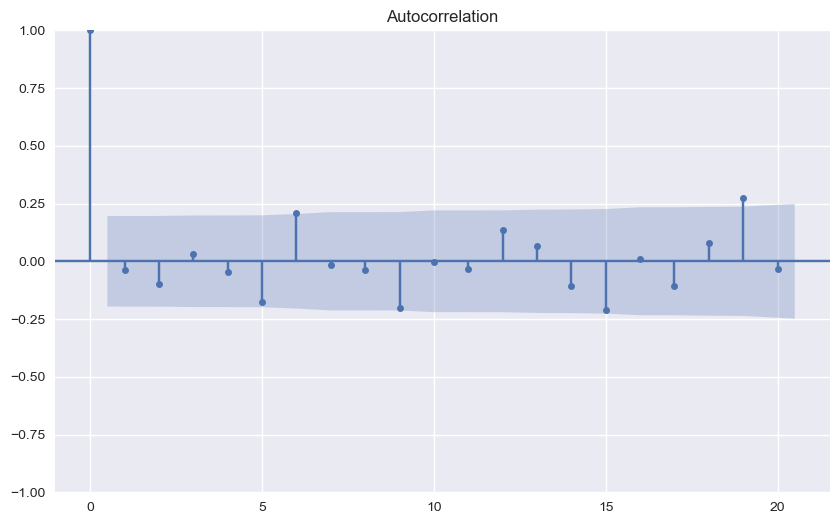

In [50]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 6))

plot_acf(r, ax=ax);

# Monomial Regression

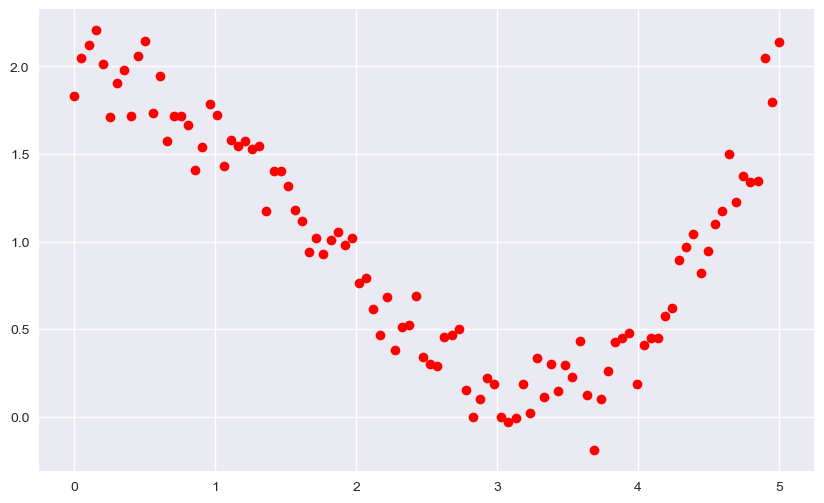

In [51]:
x = np. linspace(0, 5, 100)
y = 2 - 0.5 * x ** 2 + 0.1 * x ** 3 + np. random.standard_normal(len(x)) * 0.15
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

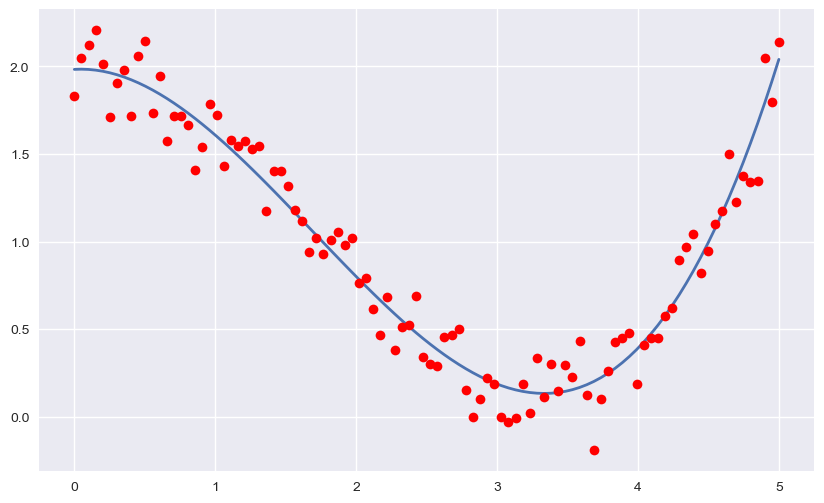

In [52]:
reg = np.polyfit(x, y, 3)

plt.figure(figsize=(10, 6))
plt. plot(x, np. polyval(reg, x), lw=2.0)
plt. plot(x, y, 'ro')

Let us again check for the assumptions:

* **linearity**: given
* **independence**: given
* **zero mean**: mean zero given (see below)
* **no correlation**: correlation of zero (see below)
* **homoscedasticity**: given (see below)
* **no autocorrelation**: given (see below)

In [53]:
r = np. polyval(reg, x) - y

## Zero-mean

In [54]:
r.mean()

-7.549516567451065e-17

## No Correlation

In [55]:
np.corrcoef(r, x)

array([[1.00000000e+00, 4.90205312e-15],
       [4.90205312e-15, 1.00000000e+00]])

## Heteroscedasticity

In [56]:
split = int(len(x) / 2)
bartlett(r[:split], r[split:])

BartlettResult(statistic=0.7718921994769598, pvalue=0.37963232108418077)

## No Autocorrelation

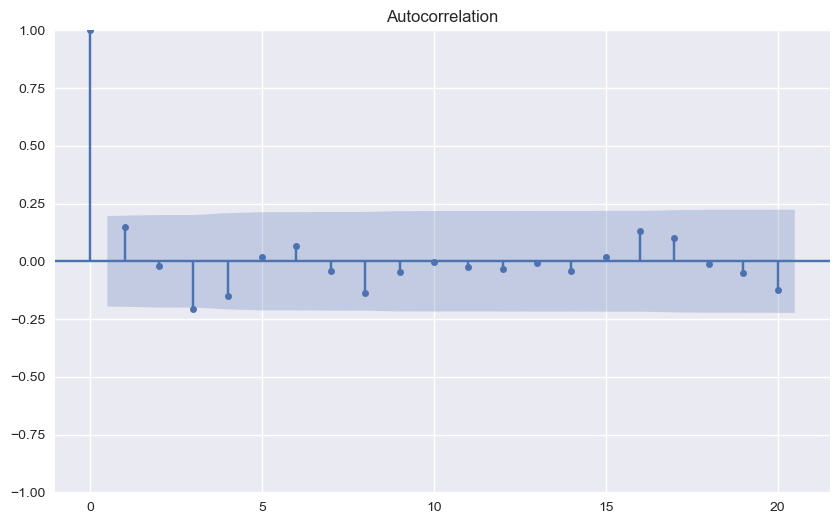

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(r, ax=ax);

## Multivariate Regression

In [58]:
x1 = np.random.random(200) * 5
x2 = np.random.random(200) * 5
y = 2 - 0.5 * x1 ** 2 + 0.1 * x2 ** 3 + np.random.standard_normal(len(x1)) * 0.15

In [65]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [83]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'text': '', 'categories': ''})
df.iplot(kind='scatter3d', x='x1', y='x2', z='y', text='text', categories='categories', size=4)